In [ ]:
!pip install git+https://github.com/williamedwardhahn/greentree
from greentree import *
import matplotlib.pyplot as plt
import numpy as np
import random

  Cloning https://github.com/williamedwardhahn/greentree to /tmp/pip-req-build-etl4781k
  Running command git clone -q https://github.com/williamedwardhahn/greentree /tmp/pip-req-build-etl4781k
  Created wheel for ImportGreenTree: filename=ImportGreenTree-0.0.1-cp36-none-any.whl size=11093 sha256=c6073c6eab3244fe387817f5b8bf3e724a077bd236ee007a5be1e9a178670c03
  Stored in directory: /tmp/pip-ephem-wheel-cache-ricog1mf/wheels/1d/6d/83/08ca4a3416437c2ad876c6efcd10e2aca069a2793f336765ac
Successfully built ImportGreenTree


In [ ]:
s = ["orange", "apple", "banana"]

In [ ]:
[get_images(s[i], limit = 100) for i in np.arange(len(s))]
remove_transparency_list("/content/image_set/")
split("/content/image_set/")
os.chdir("/content/")
data_dir = 'image_set'

OK: ThinkstockPhotos-494037394.jpg
OK: 1200px-Ambersweet_oranges.jpg
OK: o-GMO-ORANGES-facebook.jpg
OK: orange-large.jpg
OK: bowl-of-oranges.jpg
OK: benz-lorange-sliced-oranges.jpg
OK: oranges.jpg
OK: sweet+oranges.jpg
OK: Eat-an-Orange-Step-16-Version-4.jpg
OK: o-PEELED-ORANGES-facebook.jpg
OK: Orange-1-1173x1200.png
OK: orange.jpg
OK: orange-1.jpg
OK: 180712100504_1_540x360.jpg
OK: purepng.com-orangesorangefruitfoodta.png
OK: Fruit-Orange_1e3aafb2-2927-4725-84ff.png
OK: orange-207819-19201.jpg
OK: 148473875.jpg
OK: 812-sweet-orange-eo.jpg
Invalid image, not saving orange.jpg
OK: orange-2.jpg
OK: KRLMkuaBjm5mKDDP
OK: orange-picture-id185284489
OK: orange-web-1024x768.jpg
OK: Oranges-by-Morguefile.jpg
OK: Full-HD-Orange-Fruit-HD-Wallpaper.jpg
OK: Inside-Navel-Orange.jpg
OK: 69935-Orange.png
OK: Oranges-oranges-35302591-2738-1825.jpg
OK: IMG_3118.jpg
OK: orange-3.jpg
OK: IMG_3118-1.jpg
OK: 180712100504_1_540x360-1.jpg
OK: 1280-501533231-blood-orange-on-wood.jpg
OK: 148473875-1.jpg
OK: N

In [ ]:
nban = os.listdir('image_set/train/banana')
nora = os.listdir('image_set/train/orange')
napp = os.listdir('image_set/train/apple')

print("Number of banana images for training: ", len(nban))
print("Number of orange images for training: ", len(nora))
print("Number of apple images for training: ", len(napp))


Number of banana images for training:  51
Number of orange images for training:  52
Number of apple images for training:  55


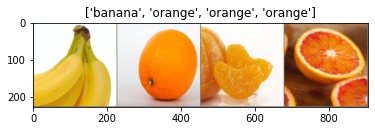

Class Names:  ['apple', 'banana', 'orange'] Dataset Size:  {'train': 158, 'val': 38}


In [ ]:
labels = data_show(data_dir,4)

In [ ]:
model = train_model(data_dir, num_epochs=5)
summary(model, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Epoch 0/4
----------
train Loss: 0.7759 Acc: 0.6329
val Loss: 0.0404 Acc: 1.0000
Epoch 1/4
----------
train Loss: 0.5312 Acc: 0.7975
val Loss: 0.0105 Acc: 1.0000
Epoch 2/4
----------
train Loss: 0.5487 Acc: 0.8165
val Loss: 0.0337 Acc: 1.0000
Epoch 3/4
----------
train Loss: 0.3878 Acc: 0.8481
val Loss: 0.0090 Acc: 1.0000
Epoch 4/4
----------
train Loss: 0.3214 Acc: 0.8924
val Loss: 0.0094 Acc: 1.0000
Training complete in 0m 52s
Best val Acc: 1.000000
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7          

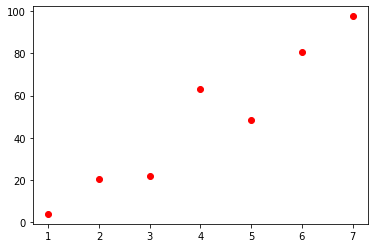

In [ ]:
# I want to demo what the loss function might mean, using a linear fit as an example

# First, set up the data
x = [1, 2, 3, 4, 5, 6, 7]
y = [a*12+(random.random()-0.5)*30 for a in x]

# Show it
plt.plot(x,y,'ro')
plt.show()



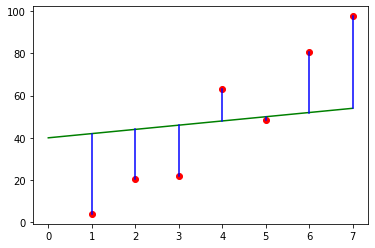

5545.721352478012


In [ ]:
# Now, let's take a guess at a slope
m = 2
x1 = np.arange(8)

cx = np.mean(x)
cy = np.mean(y)
b = cy - m*cx

y1 = m*x1+b
plt.plot(x,y,'ro',x1,y1,'g-')
loss = 0
for i in np.arange(7):
  plt.plot([x[i],x[i]],[m*(i+1)+b,y[i]],'b-')
  loss += ((m*(i+1)+b-y[i])**2)
plt.show()
print(loss)


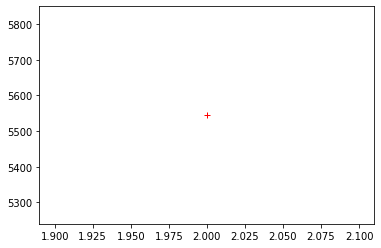

In [ ]:
# Now, I'm going to run the previous cell with different m/b values
# For simplicity, I'm going to take b=0
marr = [2]
larr = [5545]

plt.plot(marr,larr,'r+')
plt.show()

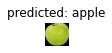

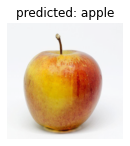

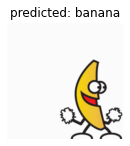

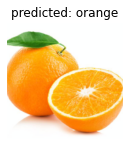

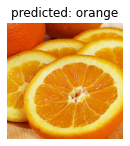

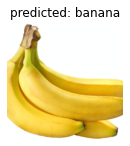

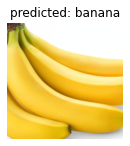

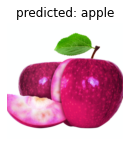

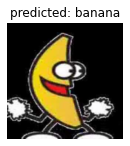

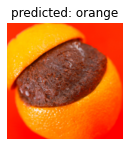

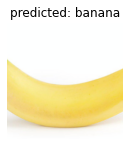

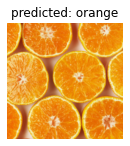

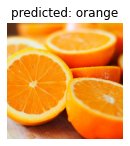

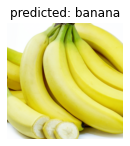

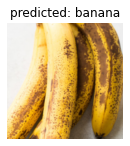

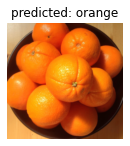

<Figure size 1440x1440 with 0 Axes>

In [ ]:
show_output(model,data_dir)

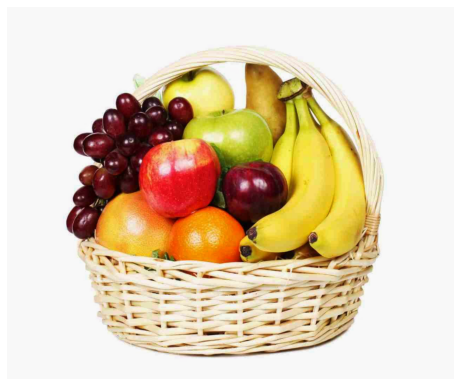

In [ ]:
# Get the students to pick an image and put it in here.
im = imageio.imread('')[:,:,:3]
plot(im)

In [ ]:
inference(im,model)

0

In [ ]:
labels[inference(im,model)]

'apple'

In [ ]:
def label_image(url,show=True):
    im = imageio.imread(url)[:,:,:3]
    if show:
        plot(im)
    return labels[inference(im,model)]

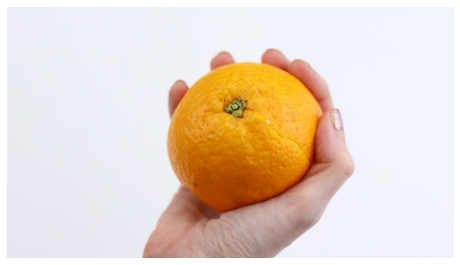

'orange'

In [ ]:
label_image('https://www.wikihow.com/images/d/dd/Eat-an-Orange-Step-16-Version-4.jpg')

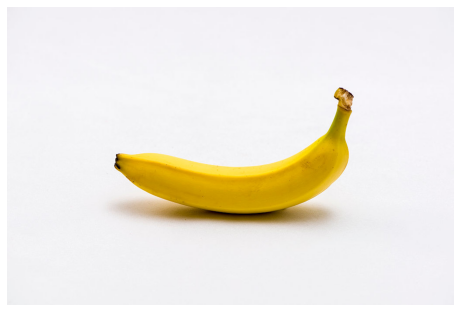

'banana'

In [ ]:
label_image('https://api.time.com/wp-content/uploads/2019/11/gettyimages-459761948.jpg')

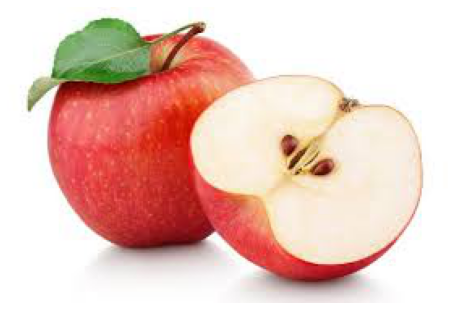

'apple'

In [ ]:
label_image('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTKGvWFWaNYybFAHJe2scHZIwqvyDJhnRubBg&usqp=CAU')